In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
os.makedirs("figures", exist_ok=True)
paths = {
    "LogisticRegression": "data/predictions_logreg_lr.csv",
    "RandomForest":       "data/predictions_logreg_rf.csv",
    "XGBoost":            "data/predictions_logreg_xgb.csv",
}

dfs = []
for model_name, path in paths.items():
    df = pd.read_csv(path)
    df["model"] = model_name
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all[["model", "y_true", "y_prob"]].head()


,model,y_true,y_prob
0,LogisticRegression,0,0.296221
1,LogisticRegression,1,0.564542
2,LogisticRegression,0,0.400224
3,LogisticRegression,1,0.579672
4,LogisticRegression,1,0.463059


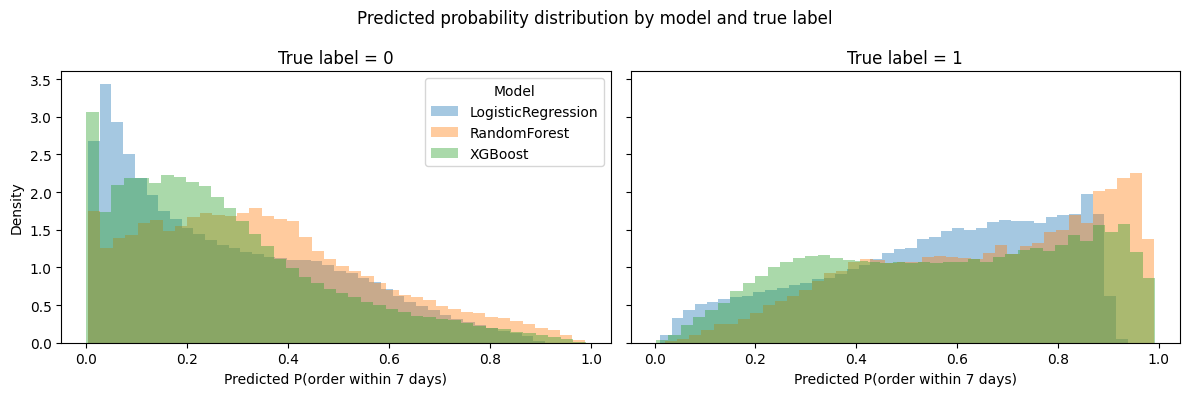

In [24]:
import numpy as np

models = df_all["model"].unique()
labels = [0, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

for i, label in enumerate(labels):
    ax = axes[i]
    for model in models:
        sub = df_all[(df_all["y_true"] == label) & (df_all["model"] == model)]["y_prob"].dropna()
        if sub.empty:
            continue
        ax.hist(
            sub,
            bins=40,
            alpha=0.4,
            density=True,           # The vertical axis is labeled "probability density," which can be roughly interpreted as a percentage.
            label=model,
        )
    ax.set_title(f"True label = {label}")
    ax.set_xlabel("Predicted P(order within 7 days)")
    if i == 0:
        ax.set_ylabel("Density")

axes[0].legend(title="Model")
fig.suptitle("Predicted probability distribution by model and true label", y=0.98)
plt.tight_layout()
plt.savefig("figures/pred_prob_by_model.png", dpi=300)
plt.show()

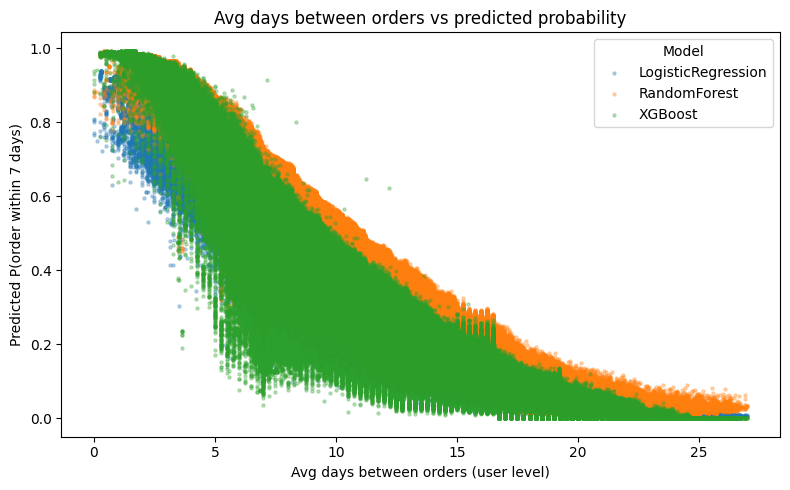

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))

for model in models:
    sub = df_all[df_all["model"] == model]
    ax.scatter(
        sub["avg_days_between_orders"],
        sub["y_prob"],
        s=5,
        alpha=0.3,
        label=model,
    )

ax.set_xlabel("Avg days between orders (user level)")
ax.set_ylabel("Predicted P(order within 7 days)")
ax.set_title("Avg days between orders vs predicted probability")
ax.legend(title="Model")
plt.tight_layout()
fig.savefig("figures/avg_days_vs_prob.png", dpi=300, bbox_inches="tight")
plt.show()
